<a href="https://colab.research.google.com/github/thihanaung-thnn/python_projects/blob/main/high_fatality_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, classification_report
plt.style.use('seaborn')
%matplotlib inline
mpl.rcParams['figure.figsize'] = 11.7,8.27
import warnings
warnings.filterwarnings('ignore')

In [ ]:
accidents = pd.read_csv('/content/drive/MyDrive/Programming Projects/Python/high_fatality_accidents/accident-data.csv')
lookup = pd.read_csv('/content/drive/MyDrive/Programming Projects/Python/high_fatality_accidents/road-safety-lookups.csv')

In [ ]:
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,09:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,13:55,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,01:25,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,01:50,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,02:25,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1


In [ ]:
accidents['datetime'] = pd.to_datetime(accidents['date'] + ' ' + accidents['time'])
accidents['day_name'] = accidents['datetime'].dt.day_name()
accidents['hour'] = accidents['datetime'].dt.hour
accidents['month'] = accidents.datetime.dt.month_name()

In [ ]:
major_time = accidents[accidents['accident_severity'].isin([1,2])][['hour','day_name','month','accident_severity']]

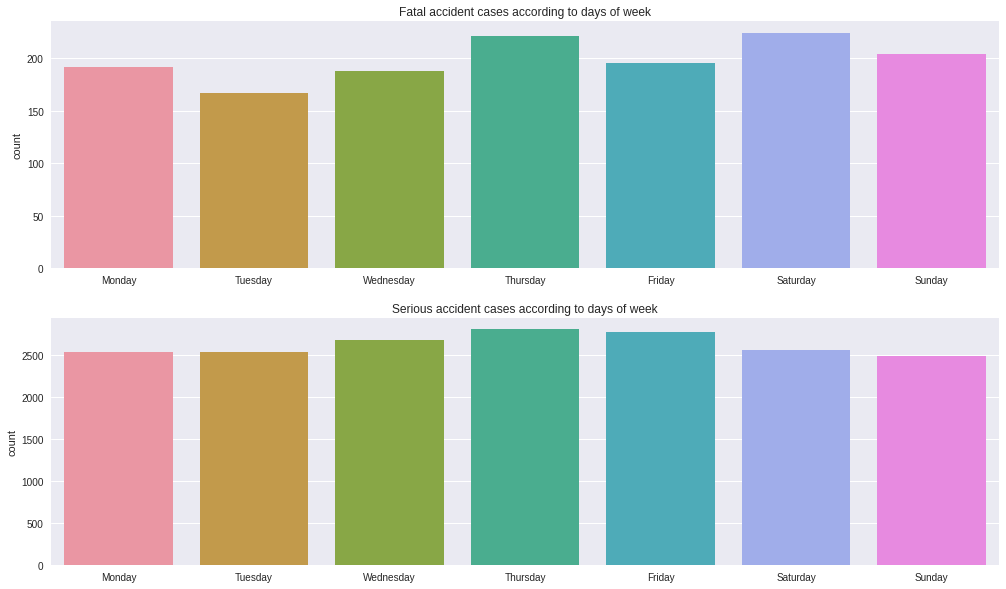

In [ ]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(17,10))
sns.countplot(x='day_name', data=major_time[major_time['accident_severity']==1],ax=ax1,order=days)
ax1.set_title('Fatal accident cases according to days of week')
ax1.set_xlabel('')

sns.countplot(x='day_name',data=major_time[major_time['accident_severity']==2],ax=ax2,order=days)
ax2.set_title('Serious accident cases according to days of week')
ax2.set_xlabel('');

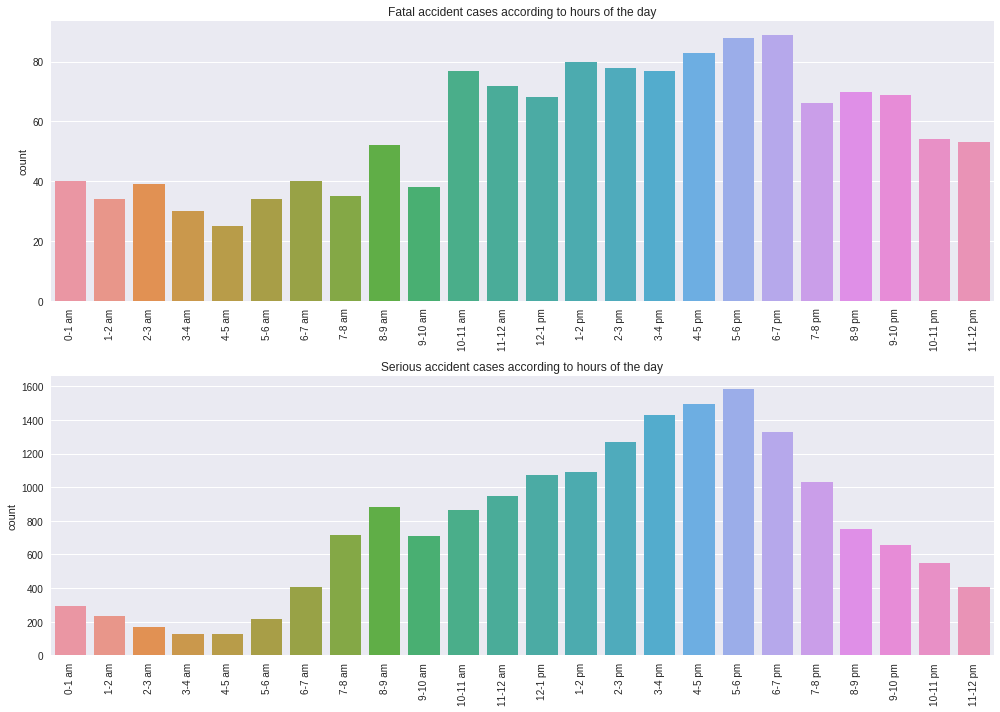

In [ ]:
hour = [f'{i-1}-{i} {j}' for j in ['am','pm'] for i in range(1,13)]
hour[12] = '12-1 pm'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10))
sns.countplot(x='hour', data=major_time[major_time['accident_severity']==1],ax=ax1)
ax1.set_title('Fatal accident cases according to hours of the day')
ax1.set_xlabel('')
ax1.set_xticklabels(hour, rotation=90)

sns.countplot(x='hour',data=major_time[major_time['accident_severity']==2],ax=ax2)
ax2.set_title('Serious accident cases according to hours of the day')
ax2.set_xlabel('')
ax2.set_xticklabels(hour, rotation=90)
plt.tight_layout();

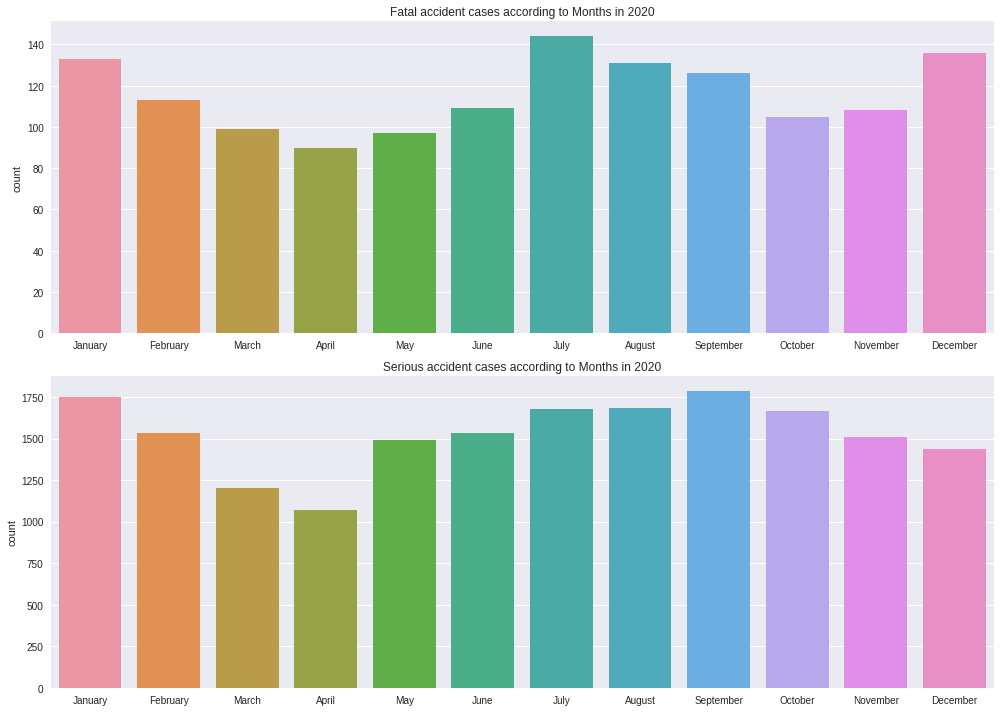

In [ ]:
months = ['January','February','March','April','May','June','July','August','September',
          'October','November','December']

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10))
sns.countplot(x='month', data=major_time[major_time['accident_severity']==1],ax=ax1,order=months)
ax1.set_title('Fatal accident cases according to Months in 2020')
ax1.set_xlabel('')


sns.countplot(x='month',data=major_time[major_time['accident_severity']==2],ax=ax2,order=months)
ax2.set_title('Serious accident cases according to Months in 2020')
ax2.set_xlabel('')

plt.tight_layout();

In [ ]:
accidents['date'] = pd.to_datetime(accidents['date'])
accident_count = accidents.groupby(['date','accident_severity'],as_index=False)['accident_index'].count()
accident_count.rename({'accident_index':'count'}, axis=1, inplace=True)


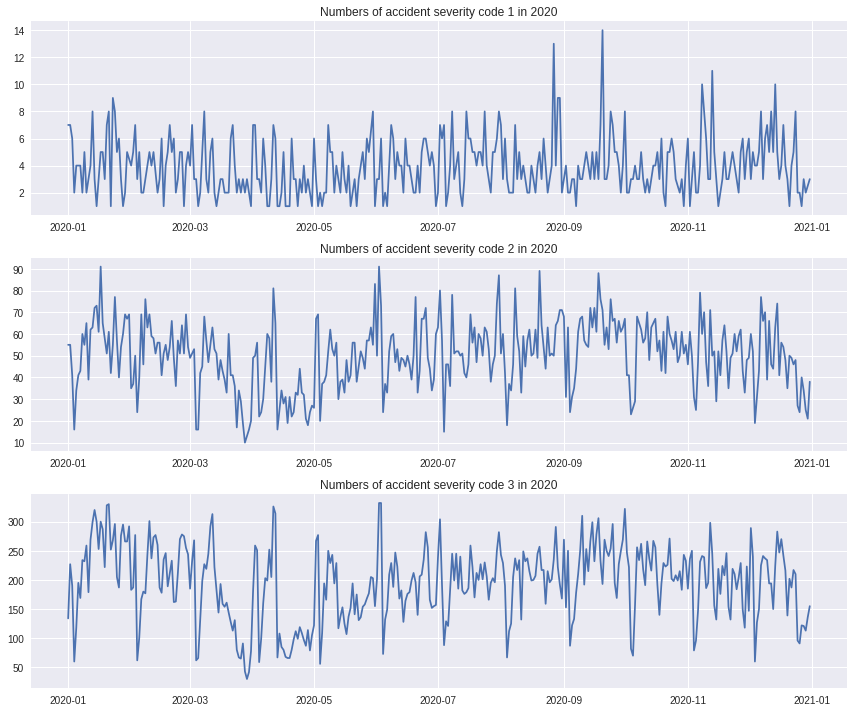

In [ ]:
plt.figure(figsize=(12,10))
for i in range(1,4):  
    plt.subplot(3,1,i);
    tmp = accident_count[accident_count['accident_severity']==i]

    plt.plot(tmp['date'], tmp['count'])
    plt.title(f'Numbers of accident severity code {i} in 2020')
plt.tight_layout()


In [ ]:
accident_count2 = accident_count.pivot(index='date',columns='accident_severity',values='count')
accident_count2.columns = ['fatal','serious','slight']
accident_count2.head()

,fatal,serious,slight
date,,,
2020-01-01,7.0,55.0,134.0
2020-01-02,7.0,55.0,227.0
2020-01-03,6.0,41.0,190.0
2020-01-04,2.0,16.0,60.0
2020-01-05,4.0,34.0,118.0


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
for col in accident_count2.columns: 
    result = adfuller(accident_count2[col].fillna(0))
    print(f"p_value of {col} accidents : {result[1]}")

p_value of fatal accidents : 3.482429785064164e-29
p_value of serious accidents : 2.0180376604247635e-05
p_value of slight accidents : 0.0003112460590736423


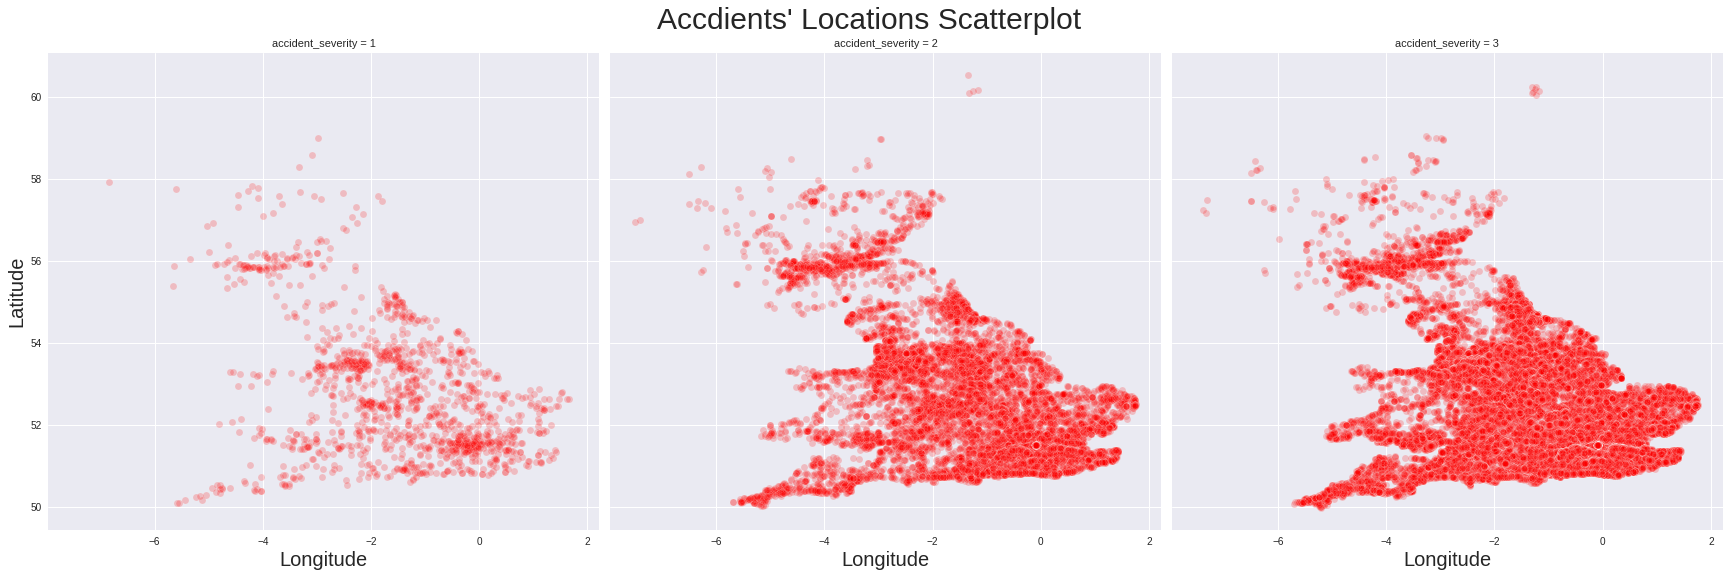

In [ ]:
g = sns.relplot(y='latitude',x='longitude',data=accidents,col='accident_severity',height=8,
                kind='scatter',alpha=0.2,color='red')
g.fig.suptitle("Accdients' Locations Scatterplot",fontsize=30)
g.fig.subplots_adjust(top=0.9)
g.set_xlabels('Longitude',fontsize=20)
g.set_ylabels('Latitude',fontsize=20)


In [ ]:
horizontal_miles = np.ceil((max(accidents['longitude'])- min(accidents['longitude']))*54.6)+1
verticle_miles = np.ceil((max(accidents['latitude'])- min(accidents['latitude']))*54.6)+1

longitude_bins = np.linspace(min(accidents['longitude']), max(accidents['longitude']),int(horizontal_miles))
latitude_bins = np.linspace(min(accidents['latitude']), max(accidents['latitude']), int(verticle_miles))
accidents['lonbin'] = pd.cut(accidents.longitude,longitude_bins)
accidents['latbin'] = pd.cut(accidents.latitude, latitude_bins)
accidents.dropna(inplace=True)
accidents['area_bin'] = accidents['lonbin'].astype(str) + '-' + accidents['latbin'].astype(str)

In [ ]:
accidents.shape

(91183, 34)

In [ ]:
major_accident_areas = accidents[accidents['accident_severity'].isin([1,2])]['area_bin'].value_counts()
major_accident_df = accidents[accidents['area_bin'].isin(major_accident_areas[major_accident_areas > 15].index.values)][['longitude','latitude']]

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_geo(major_accident_df,lat='latitude',lon='longitude')
fig.update_layout(geo = dict(scope='europe'))
fig.show()

In [ ]:
def select_columns(df):
    category_col = ['day_of_week','month','hour','first_road_class','road_type','speed_limit','junction_detail',
                    'second_road_class','pedestrian_crossing_physical_facilities','light_conditions','weather_conditions',
                    'road_surface_conditions','special_conditions_at_site','carriageway_hazards',
                    'urban_or_rural_area']
    numerical_col = ['number_of_vehicles','number_of_casualties']
    target_col = ['accident_severity']

    accidents_selected = pd.DataFrame()
    for col in category_col:
        accidents_selected[col] = df[col].astype('category')
    accidents_selected[category_col].replace([-1,99],np.nan,inplace=True)
    accidents_selected[numerical_col] = df[numerical_col]
    accidents_selected[target_col] = df[target_col]
    accidents_selected.replace({target_col[0]:{2:1,3:0}},inplace=True)
    accidents_selected.dropna(inplace=True)

    preprocess_df = pd.DataFrame()
    preprocess_df['single_vehicle'] = np.where(accidents_selected['number_of_vehicles']==1,1,0).astype('uint8')
    preprocess_df['single_person_affected'] = np.where(accidents_selected['number_of_casualties']==1,1,0).astype('uint8')
    preprocess_df['first_road_class_A'] = np.where(accidents_selected['first_road_class'].isin([2,3]),1,0).astype('uint8')
    preprocess_df['second_road_class_A'] = np.where(accidents_selected['second_road_class'].isin([2,3]),1,0).astype('uint8')
    preprocess_df['road_type_one_way'] = np.where(accidents_selected['road_type'].isin([2,6,12]),1,0).astype('uint8')
    preprocess_df['speed_limit_more_than_30'] = np.where(accidents_selected['speed_limit'].astype('int') > 30,1,0).astype('uint8')
    preprocess_df['junction_or_not'] = np.where(accidents_selected['junction_detail']==0,0,1).astype('uint8')
    preprocess_df['pedestrian_crossing_facilities_present'] = np.where(accidents_selected['pedestrian_crossing_physical_facilities']==0,0,1).astype('uint8')
    preprocess_df['daylight'] = np.where(accidents_selected['light_conditions']==1,1,0).astype('uint8')
    preprocess_df['weather_fine'] = np.where(accidents_selected['weather_conditions'].isin([1,4]),1,0).astype('uint8')
    preprocess_df['road_surface_dry'] = np.where(accidents_selected['road_surface_conditions']==1,1,0).astype('uint8')
    preprocess_df['special_conditions_present'] = np.where(accidents_selected['special_conditions_at_site']==0,0,1).astype('uint8')
    preprocess_df['carriageway_hazards_present'] = np.where(accidents_selected['carriageway_hazards']==0,0,1).astype('uint8')
    preprocess_df['urban'] = np.where(accidents_selected['urban_or_rural_area']==1,1,0).astype('uint8')
    preprocess_df['am'] = np.where(accidents_selected['hour'].astype('int') >= 11,1,0).astype('uint8')
    preprocess_df['day_of_week'] = accidents_selected['day_of_week']
    preprocess_df['month'] = accidents_selected['month']
    preprocess_df = pd.get_dummies(preprocess_df, drop_first=True)

    return preprocess_df, accidents_selected['accident_severity'].reset_index(drop=True)

In [ ]:
train, test = train_test_split(accidents, test_size=0.25,random_state=123)
print(train.shape)
print(test.shape)

(68387, 34)
(22796, 34)


In [ ]:
X_train, y_train = select_columns(train)
X_test, y_test = select_columns(test)


In [ ]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: accident_severity, dtype: int64

In [ ]:
# def create_xy(df):
#     y = df['accident_severity']
#     X = df.drop('accident_severity',axis=1)
#     X_dummies = pd.get_dummies(X, drop_first=True)
#     return X_dummies, y

In [ ]:
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = SMOTE(random_state=123).fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.feature_selection import RFE
def grid_search_report(model, param_grid, scoring='recall'):
    model = model
    gs = GridSearchCV(estimator = model, param_grid = param_grid, scoring=scoring,
                    n_jobs = -1, verbose=1, cv=3)
    gs.fit(X_train_smote, y_train_smote)
    y_pred = gs.predict(X_test)
    print(f"{model}")
    print(f"Best Parmaeter      : {gs.best_params_}")
    print(f"Test Accuracy Score : {accuracy_score(y_test, y_pred)}")
    print(f"Train Accuracy Score: {accuracy_score(y_train_smote, gs.predict(X_train_smote))}")
    print(f"Recall score        : {recall_score(y_test, y_pred)}")
    print(f"Classification Report ---------\n {classification_report(y_test, y_pred)}")

In [ ]:
def eliminate_columns(model, n_features=10, step=3, v=1):
    rfe = RFE(estimator=model, n_features_to_select=n_features, step=step, verbose=v)
    rfe.fit(X_train_smote, y_train_smote)
    print(f"Columns selecting : {X_train_smote.columns[rfe.support_]}")
    print(f"Accuracy score : {rfe.score(X_test, y_test)}")
    print(f"training score : {rfe.score(X_train_smote, y_train_smote)}")
    print(f"Recall score : {recall_score(y_test, rfe.predict(X_test))}")

In [ ]:
param_grid = {
        'C' : [0.0001,0.001,0.1,1,10],
        'penalty' : ['l1','l2','elasticnet','none'],
    }
model = LogisticRegression(max_iter=400)
grid_search_report(model, param_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
LogisticRegression(max_iter=400)
Best Parmaeter      : {'C': 0.0001, 'penalty': 'none'}
Test Accuracy Score : 0.7540777917189461
Train Accuracy Score: 0.6754281773248018
Recall score        : 0.11758691206543967
Classification Report ---------
               precision    recall  f1-score   support

           0       0.79      0.93      0.86     17426
           1       0.33      0.12      0.17      4890

    accuracy                           0.75     22316
   macro avg       0.56      0.53      0.51     22316
weighted avg       0.69      0.75      0.71     22316



In [ ]:
eliminate_columns(LogisticRegression(C=0.0001, penalty='none',max_iter=400),n_features=5,step=1,v=1)

Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Columns selecting : Index(['sing

In [ ]:
param_grid = {
        'C' : [0.0001,0.001,0.1,1,10],
        'penalty' : ['l1','l2','elasticnet','none'],
    }
model = LogisticRegression(max_iter=400)
grid_search_report(model, param_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
LogisticRegression(max_iter=400)
Best Parmaeter      : {'C': 0.1, 'penalty': 'l2'}
Test Accuracy Score : 0.6405717870586126
Train Accuracy Score: 0.5990076248132112
Recall score        : 0.49918200408997954
Classification Report ---------
               precision    recall  f1-score   support

           0       0.83      0.68      0.75     17426
           1       0.30      0.50      0.38      4890

    accuracy                           0.64     22316
   macro avg       0.57      0.59      0.56     22316
weighted avg       0.71      0.64      0.67     22316



In [ ]:
eliminate_columns(LogisticRegression(C=0.1, penalty='l2',max_iter=400),n_features=5,step=1,v=0)

Columns selecting : Index(['single_vehicle', 'road_type_one_way', 'speed_limit_more_than_30',
       'weather_fine', 'carriageway_hazards_present'],
      dtype='object')
Accuracy score : 0.63008603692418
training score : 0.5942564849227939
Recall score : 0.5353783231083845


In [ ]:
model = SGDClassifier()
grid_params = {
    'penalty':['l1','l2','elasticnet'],
    'alpha' : [0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
}
grid_search_report(model, grid_params)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
SGDClassifier()
Best Parmaeter      : {'alpha': 0.001, 'penalty': 'elasticnet'}
Test Accuracy Score : 0.6689370854991934
Train Accuracy Score: 0.5817655848883099
Recall score        : 0.3965235173824131
Classification Report ---------
               precision    recall  f1-score   support

           0       0.81      0.75      0.78     17426
           1       0.30      0.40      0.34      4890

    accuracy                           0.67     22316
   macro avg       0.56      0.57      0.56     22316
weighted avg       0.70      0.67      0.68     22316



In [ ]:
eliminate_columns(SGDClassifier(alpha=0.001, penalty='elasticnet'),n_features=5, step=1,v=0)

Columns selecting : Index(['single_vehicle', 'second_road_class_A', 'road_type_one_way',
       'speed_limit_more_than_30', 'daylight'],
      dtype='object')
Accuracy score : 0.6689370854991934
training score : 0.569820682784781
Recall score : 0.3965235173824131


In [ ]:
from sklearn.ensemble import RandomForestClassifier

grid_params = {
    'max_depth' : [5,10,15],
    'n_estimators' : [400,500,600],
    'random_state' : [123]
}
rf = RandomForestClassifier()
grid_search_report(rf, grid_params)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
RandomForestClassifier()
Best Parmaeter      : {'max_depth': 5, 'n_estimators': 500, 'random_state': 123}
Test Accuracy Score : 0.5958056999462269
Train Accuracy Score: 0.6356182229204184
Recall score        : 0.5973415132924336
Classification Report ---------
               precision    recall  f1-score   support

           0       0.84      0.60      0.70     17426
           1       0.29      0.60      0.39      4890

    accuracy                           0.60     22316
   macro avg       0.57      0.60      0.55     22316
weighted avg       0.72      0.60      0.63     22316



In [ ]:
eliminate_columns(RandomForestClassifier(max_depth=5, n_estimators=500, random_state=123),step=2,n_features=5,v=1)

Fitting estimator with 32 features.
Fitting estimator with 30 features.
Fitting estimator with 28 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 6 features.
Columns selecting : Index(['single_vehicle', 'first_road_class_A', 'speed_limit_more_than_30',
       'pedestrian_crossing_facilities_present', 'urban'],
      dtype='object')
Accuracy score : 0.5958056999462269
training score : 0.6101670562090502
Recall score : 0.5973415132924336


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()
param_grids = {
    'n_estimators' : [100,200],
    'learning_rate' : [0.001,0.1,1,10]
}
grid_search_report(ada, param_grids, 'accuracy')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
AdaBoostClassifier()
Best Parmaeter      : {'learning_rate': 1, 'n_estimators': 100}
Test Accuracy Score : 0.6839935472306865
Train Accuracy Score: 0.7057933254147668
Recall score        : 0.36687116564417177
Classification Report ---------
               precision    recall  f1-score   support

           0       0.81      0.77      0.79     17426
           1       0.31      0.37      0.34      4890

    accuracy                           0.68     22316
   macro avg       0.56      0.57      0.56     22316
weighted avg       0.70      0.68      0.69     22316



In [ ]:
eliminate_columns(AdaBoostClassifier(),5,1)

Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Columns selecting : Index(['weat

In [ ]:
recall_score(y_test, bayes.predict(X_test))

0.0

In [ ]:
model = LogisticRegression()

In [ ]:
model.__init__.__class__

method

In [ ]:
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_recall_curve, roc_curve

In [ ]:
y_scores = cross_val_predict(model, X_train, y_train, cv=3, 
                            method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
precisions

array([0.22830707, 0.22829474, 0.22829839, ..., 0.5       , 1.        ,
       1.        ])

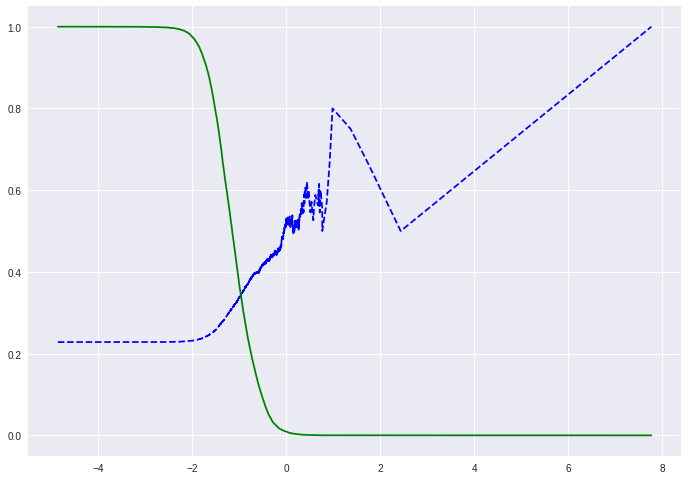

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

In [ ]:
threshold_80 = thresholds[np.argmax(precisions >= 0.5)]
recall_score(y_train, (y_scores >= threshold_80))

0.010849023587877092

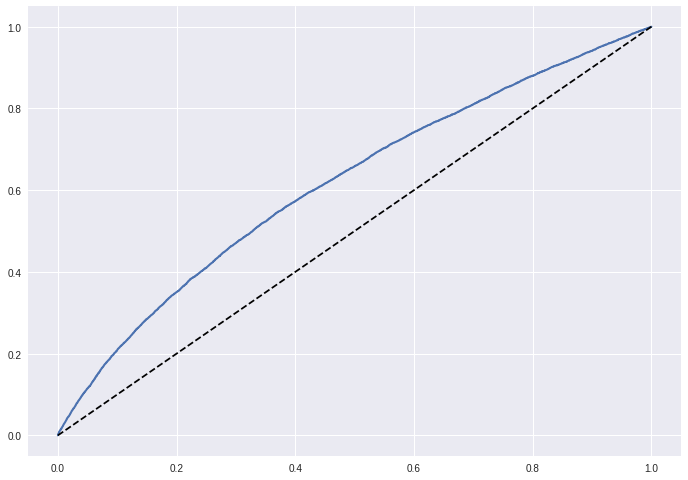

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'k--')